# Data Bootcamp Project - Pet Adoption

Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in the data (saved to desktop from Kaggle.com Competiton - Pet Adoption Speed Prediction)

In [25]:
df=pd.read_csv('dataset_final_project.csv')

## Date Exploration

### Data Fields
PetID - Unique hash ID of pet profile <br>
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.<br>
Type - Type of animal (1 = Dog, 2 = Cat)<br>
Name - Name of pet (Empty if not named)<br>
Age - Age of pet when listed, in months<br>
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)<br>
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)<br>
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)<br>
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)<br>
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)<br>
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)<br>
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)<br>
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)<br>
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)<br>
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)<br>
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)<br>
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)<br>
Quantity - Number of pets represented in profile<br>
Fee - Adoption fee (0 = Free)<br>
State - State location in Malaysia (Refer to StateLabels dictionary)<br>
RescuerID - Unique hash ID of rescuer<br>
VideoAmt - Total uploaded videos for this pet<br>
PhotoAmt - Total uploaded photos for this pet<br>
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

In [26]:
df.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0


In [27]:
df.shape

(14993, 24)

In [28]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14991.000000,14993.000000,14993.000000,14993.000000,14991.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14992.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457608,10.452078,265.272594,74.009738,1.776132,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259405,41346.028347,0.056760,3.889215,2.516441
std,0.498216,18.155790,60.056818,123.011575,0.681535,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.417131,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


Age is in months.
Gender: 1 is male, 2 is female
Type: 1 are dogs, 2 are cats
Adoption Speed: {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}

Clean up the column names per convention

In [29]:
df.columns=[i.lower() for i in df.columns]

Find the amount of null values by column

In [30]:
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

Data cleaning step. Removing name column since it has no prediction power and has a lot of missing values.
Dropping several NAs to obtain a clean data.

In [31]:
df = df.drop('name',axis=1).dropna()
df.shape

(14977, 23)

In [32]:
df

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,health,quantity,fee,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed
0,2.0,3,299,0,1.0,1,7,0,1,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,1,265,0,1.0,1,2,0,2,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,1,307,0,1.0,2,7,0,2,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1.0,4,307,0,2.0,1,2,0,2,1,...,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1.0,1,307,0,1.0,1,0,0,2,1,...,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2
5,2.0,3,266,0,2.0,5,6,0,2,1,...,1,1,0.0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2,2
6,2.0,12,264,264,1.0,1,0,0,2,3,...,1,1,300.0,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3,1
7,1.0,0,307,0,2.0,1,2,7,2,1,...,1,6,0.0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9,3
8,2.0,2,265,0,2.0,6,0,0,2,2,...,1,1,0.0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6,1
9,2.0,12,265,0,2.0,1,7,0,2,2,...,1,1,0.0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2,4


What percentage of the dataset is dogs vs cats?

In [10]:
df['type'].value_counts()

1    8132
2    6861
Name: type, dtype: int64

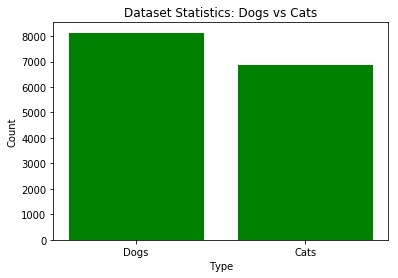

In [11]:
x=['Dogs','Cats']
y=[8132,6861]
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#df['Type'].plot.barh(ax=ax,figsize=(5,5),color='g')
#ax.set_title('Dataset Statistics: Dogs vs Cats')
#ax.set_xlabel('Count')
#ax.set_ylabel('Type')

Plot adoption speed

Text(0, 0.5, 'Adoption Rate')

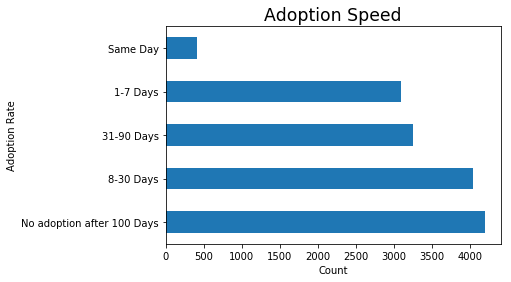

In [12]:
df['adoptionspeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh')
plt.title('Adoption Speed', fontsize='xx-large')
plt.xlabel('Count')
plt.ylabel('Adoption Rate')

In [13]:
df['adoptionspeed'].value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: adoptionspeed, dtype: int64

In [14]:
len(df.loc[df['adoptionspeed']==4])/len(df)

0.2799306342960048

Sadly, nearly 28% of all pets in our dataset were not adopted after 100 days

Is the adoption speed better (value=smaller) for dogs or cats?

In [15]:
adopt_speed_dog=((len(df.loc[(df['adoptionspeed']==0)&(df['type']==1),:])*0)+(len(df.loc[(df['adoptionspeed']==1)&(df['type']==1),:])*1)+(len(df.loc[(df['adoptionspeed']==2)&(df['type']==1),:])*2)+(len(df.loc[(df['adoptionspeed']==3)&(df['type']==1),:])*3)+(len(df.loc[(df['adoptionspeed']==4)&(df['type']==1),:])*4))/len(df['type']==1)
print('Dog adoption speed ' + str(adopt_speed_dog))
adopt_speed_cat=((len(df.loc[(df['adoptionspeed']==0)&(df['type']==2),:])*0)+(len(df.loc[(df['adoptionspeed']==1)&(df['type']==2),:])*1)+(len(df.loc[(df['adoptionspeed']==2)&(df['type']==2),:])*2)+(len(df.loc[(df['adoptionspeed']==3)&(df['type']==2),:])*3)+(len(df.loc[(df['adoptionspeed']==4)&(df['type']==2),:])*4))/len(df['type']==1)
print('Cat adoption speed ' + str(adopt_speed_cat))
if adopt_speed_dog<adopt_speed_cat:
    print('Adoption speed is quicker for dogs')
else:
    print('Adoption speed is quicker for cats')

Dog adoption speed 1.418395251117188
Cat adoption speed 1.09804575468552
Adoption speed is quicker for cats


What is the relationship/correlation between vaccination and adoption speed?

In [16]:
np.corrcoef(df['vaccinated'],df['adoptionspeed'])[0,1]

-0.05904274875792811

Merge state name to the original dataframe

In [48]:
state=pd.read_csv('state_labels.csv')
state = state.rename(columns={'StateID':'state','StateName':'state_name'})
state
df = df.merge(state,
        on='state',
        how = 'left')

Finding adoption speed per State

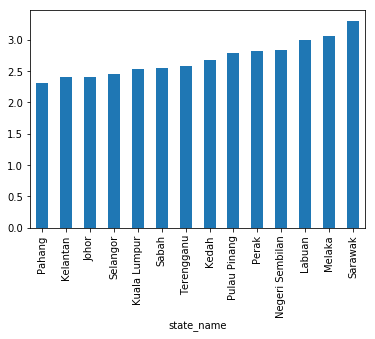

In [55]:
df.groupby('state_name')['adoptionspeed'].mean().sort_values().plot.bar()

Within all the states, Pahang has quickiest adoption speed (mean).

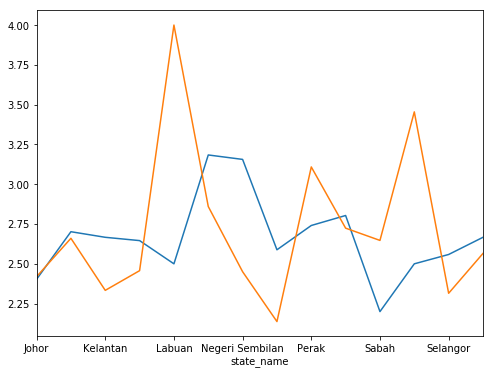

In [79]:
df.loc[df['type']==1,:].groupby('state_name')['adoptionspeed'].mean().plot(figsize=(8,6))
df.loc[df['type']==2,:].groupby('state_name')['adoptionspeed'].mean().plot(figsize=(8,6))

It seems that some states (Labuan, Sabah) have high preference for cats than dogs.

Let's see for cats and dogs what is the adpotion speed by age

In [60]:
df['age_yr']=df['age']/36

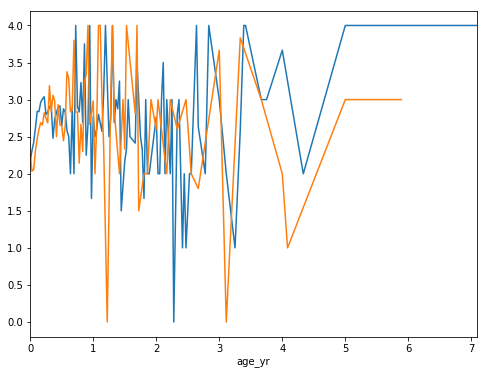

In [99]:
df.loc[df['type']==1,:].groupby('age_yr')['adoptionspeed'].mean().plot(figsize=(8,6))
df.loc[df['type']==2,:].groupby('age_yr')['adoptionspeed'].mean().plot(figsize=(8,6))

Blue is for dog and orange is for cats. It seems that cats are more likely to be adopted at age 1 and three, and are adopted quicker than dogs after age 4. Unfortunately for dogs, after age 5 they have a high chance to be not adopted.

## Regression: What features contribute to quicker adoption?

In [17]:
import statsmodels.formula.api as smf

In [18]:
reg_type = smf.ols('adoptionspeed ~ type',data=df).fit()
print(reg_type.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     125.8
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           4.34e-29
Time:                        21:29:11   Log-Likelihood:                -23658.
No. Observations:               14993   AIC:                         4.732e+04
Df Residuals:                   14991   BIC:                         4.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8307      0.030     95.617      0.0

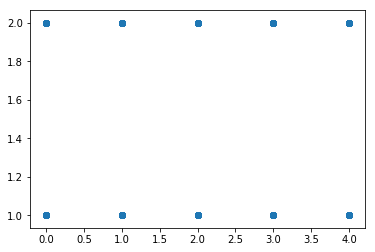

There are 2 types of pets in this dataset -  1 = Dog, 2 = Cat. The regression result shows this model using 'type' as the indepedent viarable explains only 0.8% variability of the dependent variable 'adoptionspeed' (R-squared = 0.008). 

The result is statistically siginificantly at p = 0.05 or p = 0.025.

The coefficient is -0.2156, which means the adoption speed and pet type are slightly negatively related: people tend to adopt cats faster than dogs.

The plot chart above didn't provide much useful information as type is binary.

In [19]:
reg_age = smf.ols('adoptionspeed ~ age',data=df).fit()
print(reg_age.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     153.0
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           5.71e-35
Time:                        21:31:49   Log-Likelihood:                -23644.
No. Observations:               14993   AIC:                         4.729e+04
Df Residuals:                   14991   BIC:                         4.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4483      0.011    221.803      0.0

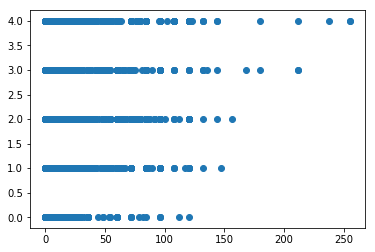

In [30]:
plt.scatter(df['age'], df['adoptionspeed'])

There are different ages (in months) of pets in this dataset. The regression result shows this model using 'age' as the indepedent viarable explains only 1% variability of the dependent variable 'adoptionspeed' (R-squared = 0.010). 

The result is statistically siginificantly at p = 0.05 or p = 0.025.

The coefficient is 0.0065, which means the adoption speed and pet age are positively related: In general, older pets tend to take a bit longer time to adopt.

The plot chart also tells the same story.

In [20]:
reg_breed1 = smf.ols('adoptionspeed ~ breed1',data=df).fit()
print(reg_breed1.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     176.4
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           5.06e-40
Time:                        21:32:40   Log-Likelihood:                -23633.
No. Observations:               14993   AIC:                         4.727e+04
Df Residuals:                   14991   BIC:                         4.728e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9557      0.043     45.175      0.0

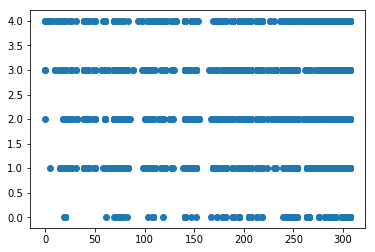

In [31]:
plt.scatter(df['breed1'], df['adoptionspeed'])

There are different primary breeds of pets in this dataset. The regression result shows this model using 'breed1' as the indepedent viarable explains only 1.2% variability of the dependent variable 'adoptionspeed' (R-squared = 0.012). 

The result is statistically siginificantly at p = 0.05 or p = 0.025.

The coefficient is 0.0021, which means the adoption speed and pet age are slightly positively related. Higher code primary breeds tend to take longer time to adopt.

The plot chart also tells the same story.

In [21]:
reg_breed2 = smf.ols('adoptionspeed ~ breed2',data=df).fit()
print(reg_breed2.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.212
Date:                Fri, 28 Jun 2019   Prob (F-statistic):             0.0224
Time:                        21:32:55   Log-Likelihood:                -23718.
No. Observations:               14993   AIC:                         4.744e+04
Df Residuals:                   14991   BIC:                         4.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5296      0.011    225.477      0.0

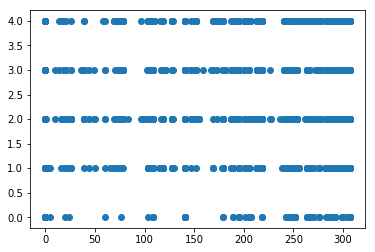

In [32]:
plt.scatter(df['breed2'], df['adoptionspeed'])

The regression result shows this model using 'breed2' as the indepedent viarable explains 0 of the dependent variable 'adoptionspeed' (R-squared = 0.000).

In [33]:
reg_gender = smf.ols('adoptionspeed ~ gender',data=df).fit()
print(reg_gender.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.94
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           1.66e-12
Time:                        21:39:43   Log-Likelihood:                -23695.
No. Observations:               14993   AIC:                         4.739e+04
Df Residuals:                   14991   BIC:                         4.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3397      0.027     87.323      0.0

The regression result shows this model using 'gender' as the indepedent viarable only explains 0.3% of the dependent variable 'adoptionspeed' (R-squared = 0.003).

In [36]:
reg_maturitysize = smf.ols('adoptionspeed ~ maturitysize',data=df).fit()
print(reg_maturitysize.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     31.31
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           2.24e-08
Time:                        21:49:52   Log-Likelihood:                -23705.
No. Observations:               14993   AIC:                         4.741e+04
Df Residuals:                   14991   BIC:                         4.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3338      0.034     68.595   

The regression result shows this model using 'maturitysize' as the indepedent viarable only explains 0.2% of the dependent variable 'adoptionspeed' (R-squared = 0.002).

In [39]:
reg_vaccinated = smf.ols('adoptionspeed ~ vaccinated',data=df).fit()
print(reg_vaccinated.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     52.44
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           4.65e-13
Time:                        21:51:36   Log-Likelihood:                -23694.
No. Observations:               14993   AIC:                         4.739e+04
Df Residuals:                   14991   BIC:                         4.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6967      0.027    101.093      0.0

Vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

The regression result shows this model using 'vaccinated' as the indepedent viarable only explains 0.3% of the dependent variable 'adoptionspeed' (R-squared = 0.003).

In [40]:
reg_health = smf.ols('adoptionspeed ~ health',data=df).fit()
print(reg_health.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.95
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           0.000320
Time:                        21:52:47   Log-Likelihood:                -23714.
No. Observations:               14993   AIC:                         4.743e+04
Df Residuals:                   14991   BIC:                         4.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3367      0.051     45.956      0.0

The regression result shows this model using 'health' as the indepedent viarable only explains 0.1% of the dependent variable 'adoptionspeed' (R-squared = 0.001).

In [41]:
reg_videoamt = smf.ols('adoptionspeed ~ videoamt',data=df).fit()
print(reg_videoamt.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.004895
Date:                Fri, 28 Jun 2019   Prob (F-statistic):              0.944
Time:                        21:54:13   Log-Likelihood:                -23720.
No. Observations:               14993   AIC:                         4.744e+04
Df Residuals:                   14991   BIC:                         4.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5166      0.010    258.286      0.0

The regression result shows this model using 'videoamt' as the indepedent viarable explains 0.000 of the model and is not statistically signigicant.

In [43]:
reg_photoamt = smf.ols('adoptionspeed ~ photoamt',data=df).fit()
print(reg_photoamt.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.096
Date:                Fri, 28 Jun 2019   Prob (F-statistic):            0.00444
Time:                        21:55:06   Log-Likelihood:                -23716.
No. Observations:               14993   AIC:                         4.744e+04
Df Residuals:                   14991   BIC:                         4.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5469      0.014    176.900      0.0

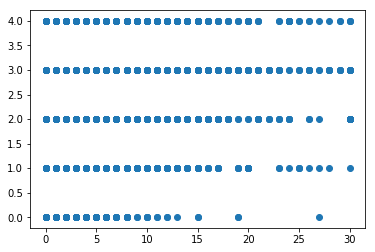

In [44]:
plt.scatter(df['photoamt'], df['adoptionspeed'])

The regression result shows this model using 'photoamt' as the indepedent viarable only explains 0.1% of the dependent variable 'adoptionspeed' (R-squared = 0.001).

In [45]:
reg_fee = smf.ols('adoptionspeed ~ fee',data=df).fit()
print(reg_fee.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2419
Date:                Fri, 28 Jun 2019   Prob (F-statistic):              0.623
Time:                        21:55:52   Log-Likelihood:                -23720.
No. Observations:               14993   AIC:                         4.744e+04
Df Residuals:                   14991   BIC:                         4.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5177      0.010    252.734      0.0

The regression result shows this model using 'fee' as the indepedent viarable explains 0.000 of the model and is not statistically signigicant.

In [46]:
reg_quantity = smf.ols('adoptionspeed ~ quantity',data=df).fit()
print(reg_quantity.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     59.61
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           1.23e-14
Time:                        21:56:15   Log-Likelihood:                -23691.
No. Observations:               14993   AIC:                         4.739e+04
Df Residuals:                   14991   BIC:                         4.740e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4371      0.014    173.385      0.0

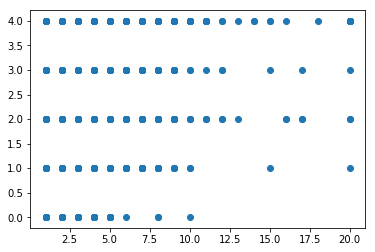

In [47]:
plt.scatter(df['quantity'], df['adoptionspeed'])

The regression result shows this model using 'quantity' as the indepedent viarable only explains 0.4% of the dependent variable 'adoptionspeed' (R-squared = 0.004).

In [59]:
df.columns

Index(['type', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2',
       'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed',
       'sterilized', 'health', 'quantity', 'fee', 'state', 'rescuerid',
       'videoamt', 'petid', 'photoamt', 'adoptionspeed'],
      dtype='object')

In [57]:
reg_total = smf.ols('adoptionspeed ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',data=df).fit()
print(reg_total.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     76.35
Date:                Fri, 28 Jun 2019   Prob (F-statistic):          3.54e-168
Time:                        22:06:58   Log-Likelihood:                -23312.
No. Observations:               14993   AIC:                         4.665e+04
Df Residuals:                   14981   BIC:                         4.674e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7803      0.092     19.263   

This total_reg model takes multiple independent variables which were tested statistically signigicant in impacting the dependent variable 'adoptionspeed'. 

This model explains 5.3% of the total variable in the independent variables, which is still a small amount. 

Based on the coefficient of each independent variable, pets faster to be adopted tend to be dogs, younger pets, and higher code primary breeds.


## Machine Learning

In [86]:
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as reg
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import train_test_split

In [87]:
y,X = patsy.dmatrices('adoptionspeed ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',
                      data=df)

In [88]:
# R square for regular linear regression
reg().fit(X,y).score(X,y)

0.05332327228800915

In [89]:
# R square for k nearest neighbor
knn().fit(X,y).score(X,y)

0.30472111310440975

In [92]:
cross_val_score(knn(),X,np.ravel(y),cv=5).mean()

0.015921865420894642

In [96]:
# checking cross validation score for random forest
cross_val_score(rf(n_estimators=100),X,np.ravel(y),cv=5).mean()

0.029369287226838937

In [97]:
cross_val_score(rf(n_estimators=50),X,np.ravel(y),cv=5).mean()

0.02556684730119756

In [98]:
# Tuning parameters for random forest
for i in range(1,10):
    print(i, cross_val_score(rf(n_estimators=200, max_depth = i),X,np.ravel(y),cv=5).mean())

1 0.04229108500400782
2 0.08745747764198733
3 0.10800476039569636
4 0.12418803225625896
5 0.1349290800945784
6 0.14123960774512767
7 0.14382730072281763
8 0.14541372055386845
9 0.14656935125316822
